In [115]:
# import the library
import pandas as  pd
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [116]:
# read the data from csv file using Read_csv function from Pandas library
Data = pd.read_csv("C:/Users/nxt-1/Desktop/Dataset/UsedCarsSA_Clean_EN.csv")

In [117]:
# display the first five row using head() function
Data.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


In [13]:
# additional method to convert categorical data to numric data 
Data["Region"].replace(Data["Region"].value_counts().sort_values(ascending=False).index,np.arange(1,28),inplace=True)

In [14]:
Data["Make"].replace(Data["Make"].value_counts().sort_values(ascending=False).index,np.arange(1,60),inplace=True)

In [118]:
# sub the dataset, and take the first 300 row and just iloc 9 = (Mileage) and iloc 11 (Price) columns
X  = Data.iloc[0:300,[9,11]]

In [119]:
# convert the data type to int64
X = X.astype("int64")

In [120]:
# fit the K_means to determine the best n_cluster using for loop wscc function
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [121]:
# using KneeLocator to select the best n_cluster
k = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [122]:
# the best n_clusters are 4 and we will represent with graph 
k.elbow

4

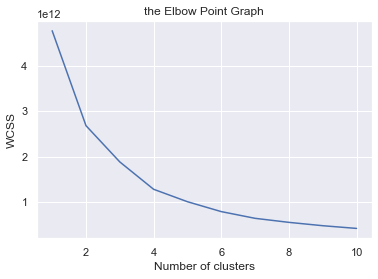

In [123]:
# plot graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("the Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [131]:
# applay the K_maens algorithms and set n_clusters 3
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=0)

In [132]:
# fit the data
Y = kmeans.fit_predict(X)

In [133]:
# convert the datafreame into numpy array
X = np.array(X)

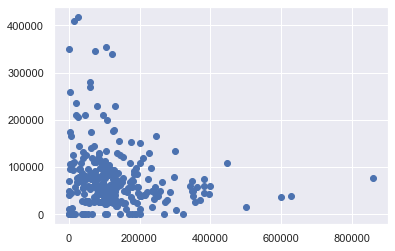

In [134]:
# display the new shape of data.
plt.scatter(X[:,0],X[:,1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

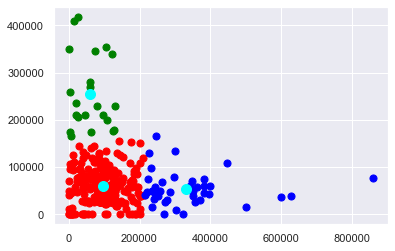

In [135]:
# plot the scatter
plt.scatter(X[Y==0,0] , X[Y==0,1],s = 50,c='green',label =  'Cluster 1')
plt.scatter(X[Y==1,0] , X[Y==1,1],s = 50,c='red',label =    'Cluster 2')
plt.scatter(X[Y==2,0] , X[Y==2,1],s = 50,c='blue',label =   'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,-1],s=100,c='cyan', label = "Centroids")
plt.show